<a href="https://colab.research.google.com/github/latifurrahmanalhamida/PCVK_244107027017_M-LATIFUR/blob/main/Tugas_pcvk_M_Latifur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M LATIFUR RAHMAN ALHAMIDA
DETEKSI KENDARAAN PADA PARKIRAN







In [1]:
!pip install ultralytics
!pip install supervision
! git clone https://github.com/ultralytics/yolov5.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 3.5 MB/s eta 0:00:00
Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 17022 (delta 122), reused 131 (delta 71), pack-reused 16805 (from 1)
Receiving objects: 100% (17022/17022), 15.74 MiB | 15.19 MiB/s, done.
Resolving deltas: 100% (11660/11660), done.


In [2]:
!pip install --upgrade ultralytics supervision

In [3]:
!pip install matplotlib-venn

# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [4]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [5]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 42.5 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 51.3MB/s]



0: 640x480 5 cars, 387.9ms
Speed: 15.7ms preprocess, 387.9ms inference, 41.6ms postprocess per image at shape (1, 3, 640, 480)
Error in processing the image: name 'results' is not defined


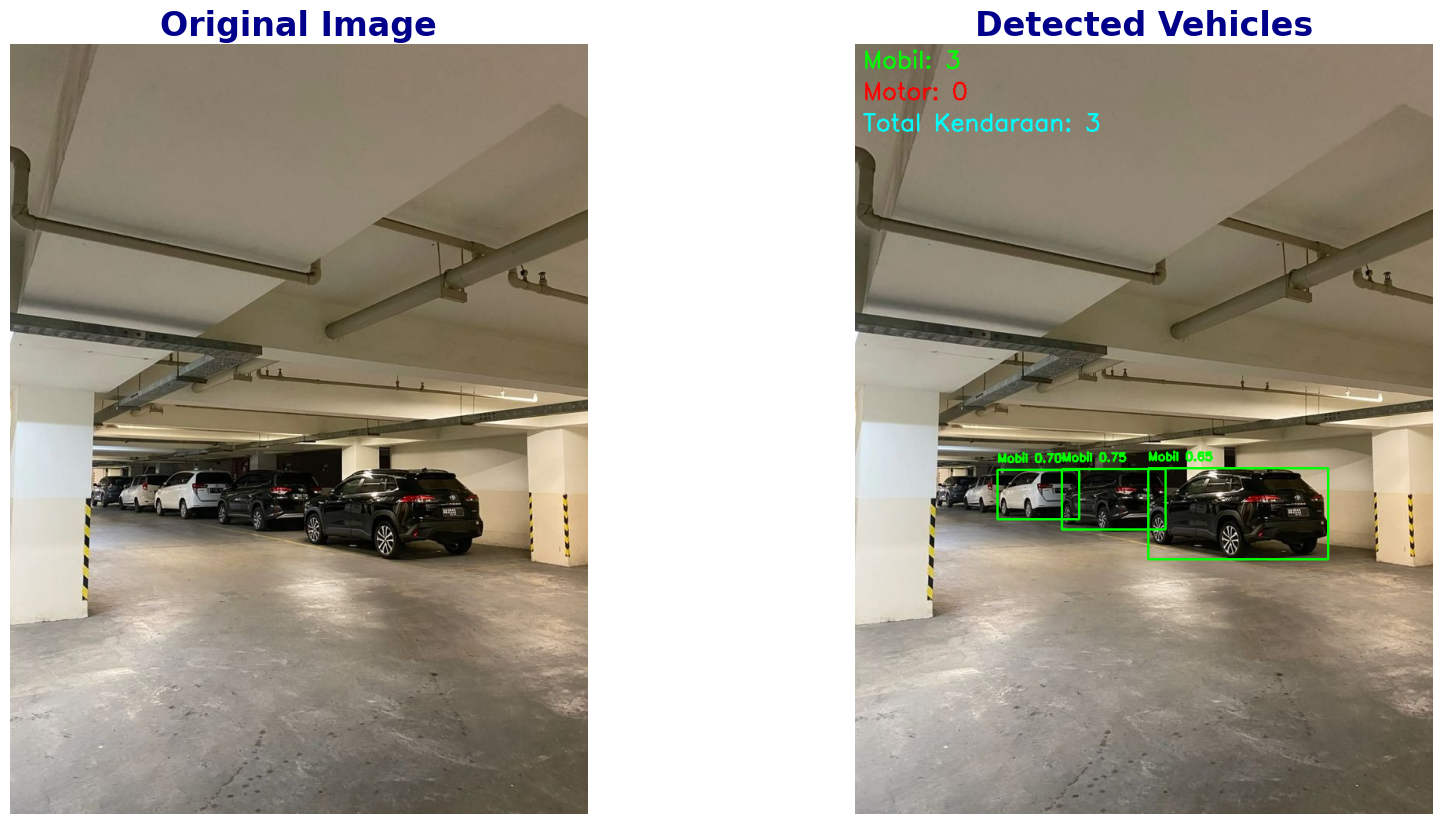

In [6]:
import torch
import os
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Memuat model YOLOv8
model = YOLO('yolov8n.pt')

def detect_vehicles(image_path):
    # Membaca gambar
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Gagal membaca gambar {image_path}")

    # Mengubah warna gambar dari BGR ke RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image_rgb)[0]

    # Inisialisasi penghitung
    total_cars = 0
    total_motorcycles = 0

    # Menyalin gambar untuk anotasi
    annotated_image = image_rgb.copy()

    # Memproses setiap deteksi
    for box in results.boxes:
        # Mendapatkan koordinat bounding box
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Mendapatkan class_id dan confidence
        class_id = int(box.cls.cpu().numpy()[0])
        conf = float(box.conf.cpu().numpy()[0])

        # Menetapkan ambang batas confidence
        confidence_threshold = 0.5

        # Jika deteksi adalah mobil (class 2)
        if class_id == 2 and conf >= confidence_threshold:
            total_cars += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # kotak hijau
            cv2.putText(annotated_image, f'Mobil {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Jika deteksi adalah sepeda motor (class 3)
        elif class_id == 3 and conf >= confidence_threshold:
            total_motorcycles += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # kotak biru
            cv2.putText(annotated_image, f'Motor {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Menambahkan statistik ke gambar
    cv2.putText(annotated_image, f"Mobil: {total_cars}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(annotated_image, f"Motor: {total_motorcycles}", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.putText(annotated_image, f"Total Kendaraan: {total_cars + total_motorcycles}", (10, 110),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    return image_rgb, annotated_image, total_cars, total_motorcycles

def display_results(original_image, annotated_image, total_cars, total_motorcycles):
    # Membuat figure dengan dua subplot berdampingan
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Menampilkan gambar asli
    ax1.imshow(original_image)
    ax1.set_title("Original Image", fontsize=24, fontweight='bold', color='darkblue')
    ax1.axis('off')

    # Menampilkan gambar yang sudah dianotasi
    ax2.imshow(annotated_image)
    ax2.set_title("Detected Vehicles", fontsize=24, fontweight='bold', color='darkblue')
    ax2.axis('off')

    # Mengatur tata letak dan menampilkan plot
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Path gambar
    image_path = '/content/drive/MyDrive/pcvk/parkiran 2.jpg'

    try:
        # Memproses deteksi
        original_image, annotated_image, total_cars, total_motorcycles = detect_vehicles(image_path)

        # Menampilkan hasil
        display_results(original_image, annotated_image, total_cars, total_motorcycles)

        # Mencetak hasil
        print("\nHasil Deteksi:")
        print(f"Total Mobil: {total_cars}")
        print(f"Total Motor: {total_motorcycles}")
        print(f"Total Kendaraan: {total_cars + total_motorcycles}")

    except Exception as e:
        print(f"Error in processing the image: {str(e)}")



0: 320x640 9 cars, 150.3ms
Speed: 4.2ms preprocess, 150.3ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)
Error in processing the image: name 'results' is not defined


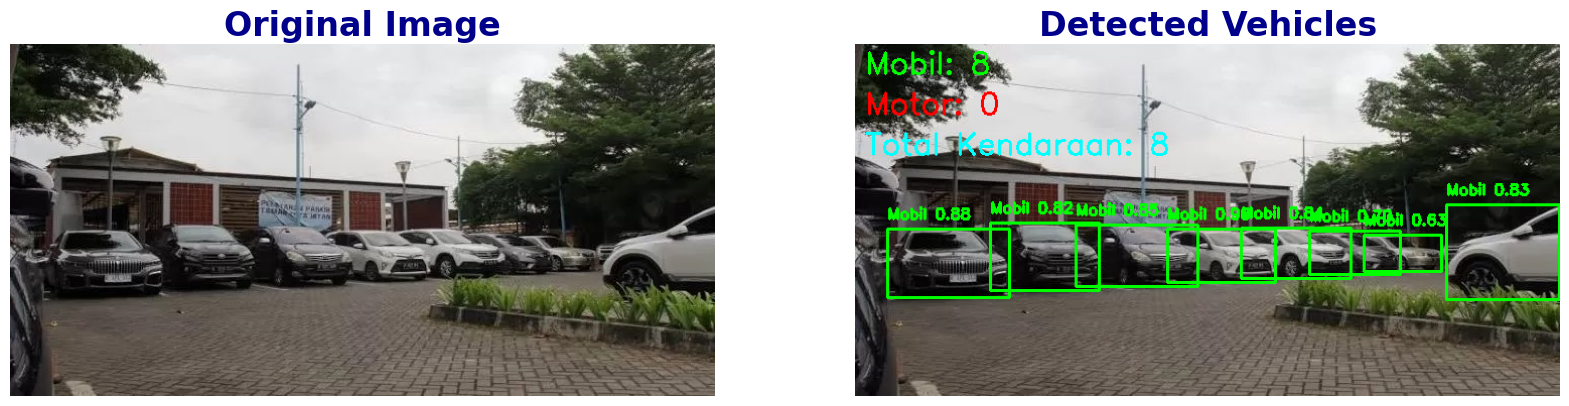

In [7]:
    # Image path
    image_path = '//content/drive/MyDrive/pcvk/mobil 6.jpg'

    try:
        # proses deteksi
        original_image, annotated_image, total_cars, total_motorcycles = detect_vehicles(image_path)

        # hasil
        display_results(original_image, annotated_image, total_cars, total_motorcycles)

        # mencetak hasil
        print("\nHasil Deteksi:")
        print(f"Total Mobil: {total_cars}")
        print(f"Total Motor: {total_motorcycles}")
        print(f"Total Kendaraan: {total_cars + total_motorcycles}")

    except Exception as e:
        print(f"Error in processing the image: {str(e)}")


0: 640x384 2 persons, 4 motorcycles, 232.3ms
Speed: 4.3ms preprocess, 232.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


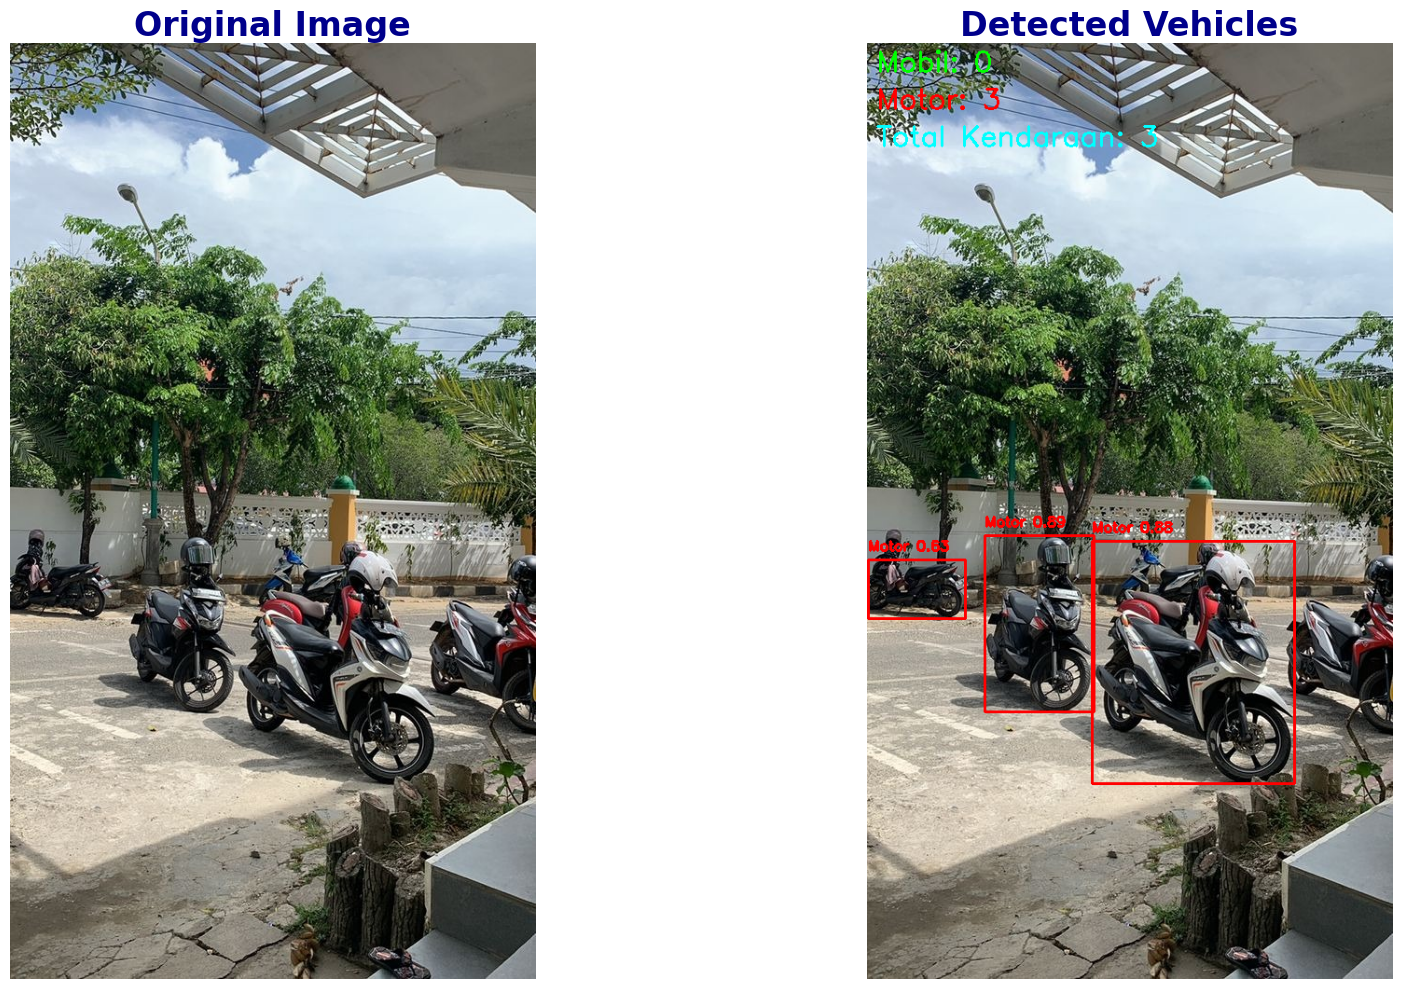


Hasil Deteksi:
Total Mobil: 0
Total Motor: 3
Total Kendaraan: 3


In [16]:
import torch
import os
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Memuat model YOLOv8
model = YOLO('yolov8n.pt')

def detect_vehicles(image_path):
    # Membaca gambar dari path
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Gagal membaca gambar {image_path}")

    # Mengubah warna gambar dari BGR ke RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Melakukan inferensi dengan model YOLO
    results = model(image_rgb)[0]

    # Inisialisasi penghitung
    total_cars = 0
    total_motorcycles = 0

    annotated_image = image_rgb.copy()

    # Memproses setiap deteksi
    for box in results.boxes:
        # Mendapatkan koordinat bounding box
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Mendapatkan class_id dan confidence
        class_id = int(box.cls.cpu().numpy()[0])
        conf = float(box.conf.cpu().numpy()[0])

        # Menetapkan ambang batas confidence
        confidence_threshold = 0.5

        # Jika deteksi adalah mobil (class 2)
        if class_id == 2 and conf >= confidence_threshold:
            total_cars += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # kotak hijau
            cv2.putText(annotated_image, f'Mobil {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Jika deteksi adalah sepeda motor (class 3)
        elif class_id == 3 and conf >= confidence_threshold:
            total_motorcycles += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # kotak biru
            cv2.putText(annotated_image, f'Motor {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Menambahkan statistik ke gambar
    cv2.putText(annotated_image, f"Mobil: {total_cars}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(annotated_image, f"Motor: {total_motorcycles}", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.putText(annotated_image, f"Total Kendaraan: {total_cars + total_motorcycles}", (10, 110),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    return image_rgb, annotated_image, total_cars, total_motorcycles

def display_results(original_image, annotated_image, total_cars, total_motorcycles):
    # Membuat figure dengan dua subplot berdampingan
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Menampilkan gambar asli
    ax1.imshow(original_image)
    ax1.set_title("Original Image", fontsize=24, fontweight='bold', color='darkblue')
    ax1.axis('off')

    # Menampilkan gambar yang sudah dianotasi
    ax2.imshow(annotated_image)
    ax2.set_title("Detected Vehicles", fontsize=24, fontweight='bold', color='darkblue')
    ax2.axis('off')

    # Mengatur tata letak dan menampilkan plot
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    image_path = '/content/drive/MyDrive/pcvk/parkiran 4.jpg'

    try:
        # Memproses
        original_image, annotated_image, total_cars, total_motorcycles = detect_vehicles(image_path)

        # hasil
        display_results(original_image, annotated_image, total_cars, total_motorcycles)

        # Mencetak hasil
        print("\nHasil Deteksi:")
        print(f"Total Mobil: {total_cars}")
        print(f"Total Motor: {total_motorcycles}")
        print(f"Total Kendaraan: {total_cars + total_motorcycles}")

    except Exception as e:
        print(f"Error in processing the image: {str(e)}")



0: 384x640 2 persons, 13 motorcycles, 216.4ms
Speed: 2.9ms preprocess, 216.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


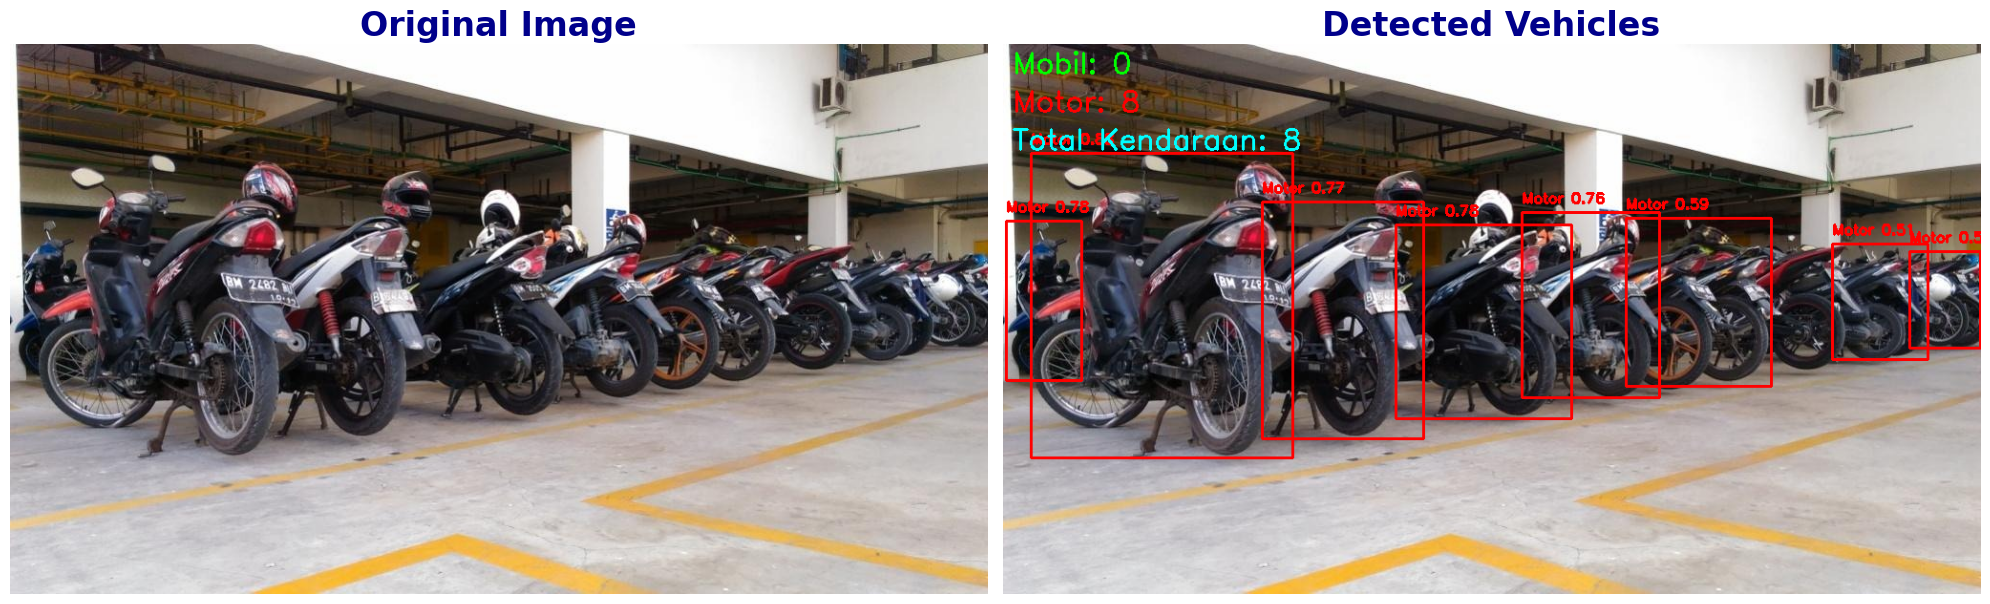


Hasil Deteksi:
Total Mobil: 0
Total Motor: 8
Total Kendaraan: 8


In [18]:
    # Image path
    image_path = '/content/drive/MyDrive/pcvk/P motor 2.jpg'

    try:
        # proses deteksi
        original_image, annotated_image, total_cars, total_motorcycles = detect_vehicles(image_path)

        # hasil
        display_results(original_image, annotated_image, total_cars, total_motorcycles)

        # mencetak hasil
        print("\nHasil Deteksi:")
        print(f"Total Mobil: {total_cars}")
        print(f"Total Motor: {total_motorcycles}")
        print(f"Total Kendaraan: {total_cars + total_motorcycles}")

    except Exception as e:
        print(f"Error in processing the image: {str(e)}")


0: 480x640 2 cars, 1 motorcycle, 1 train, 335.4ms
Speed: 3.6ms preprocess, 335.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


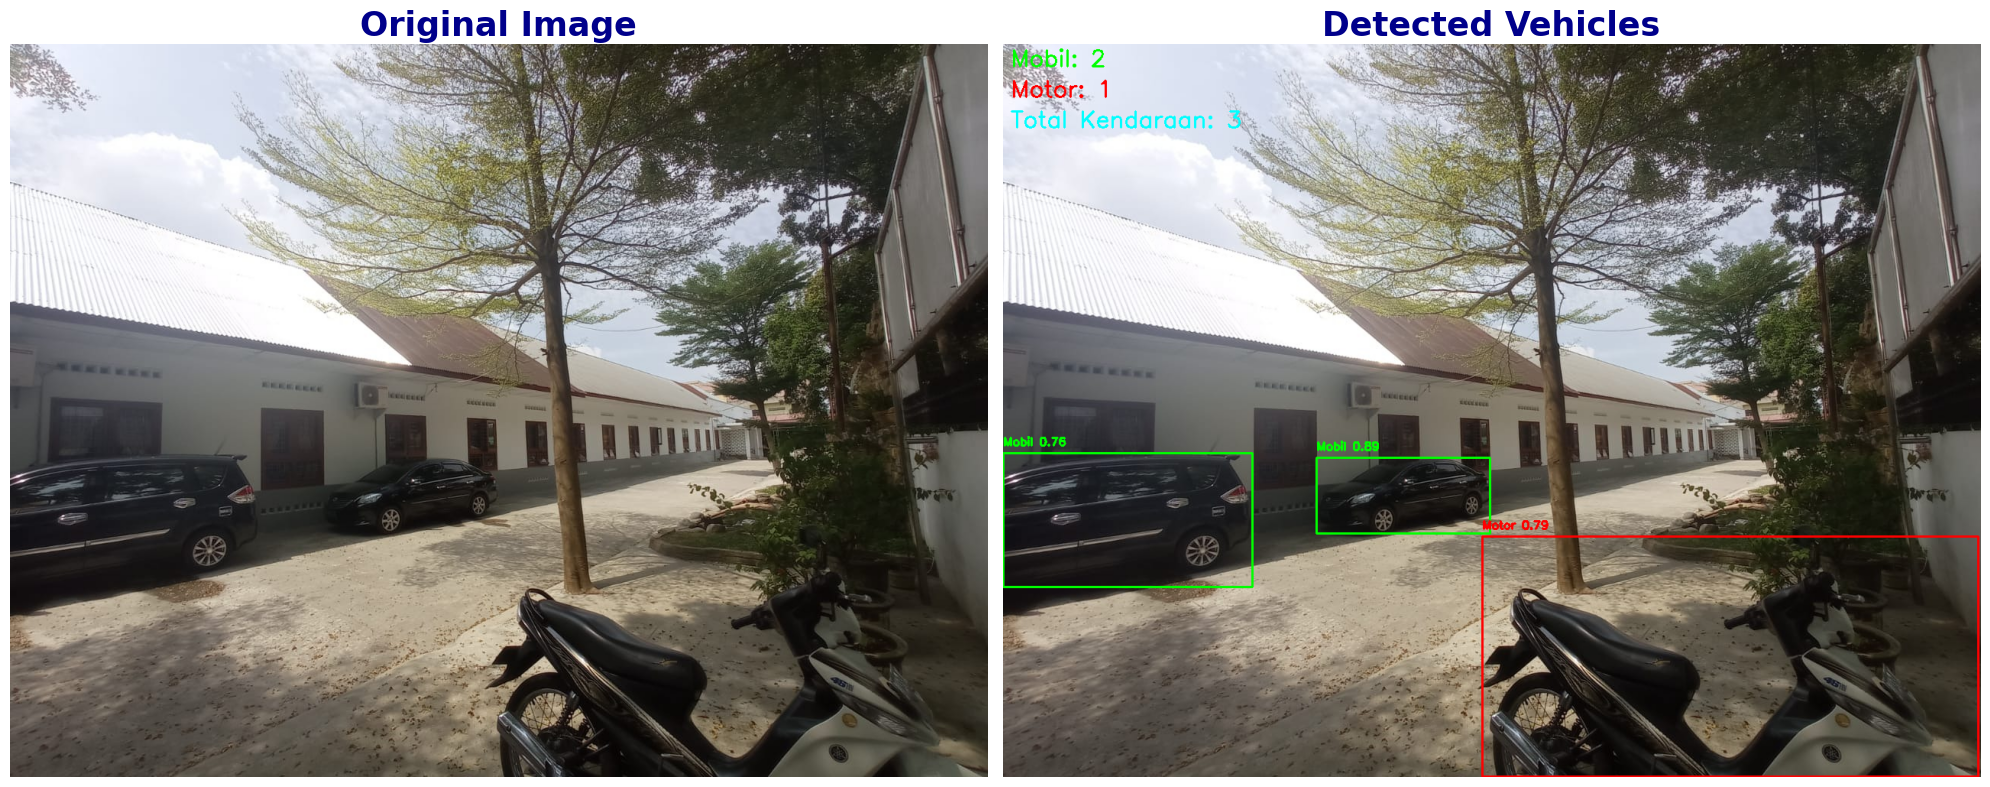


Hasil Deteksi:
Total Mobil: 2
Total Motor: 1
Total Kendaraan: 3


In [19]:
import torch
import os
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Memuat model YOLOv8
model = YOLO('yolov8n.pt')

def detect_vehicles(image_path):
    # Membaca gambar dari path yang diberikan
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Gagal membaca gambar {image_path}")

    # Mengubah warna gambar dari BGR ke RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Melakukan inferensi dengan model YOLO
    results = model(image_rgb)[0]  # Mengambil hasil pertama

    # Inisialisasi penghitung
    total_cars = 0
    total_motorcycles = 0

    # Menyalin gambar untuk anotasi
    annotated_image = image_rgb.copy()

    # Memproses setiap deteksi
    for box in results.boxes:
        # Mendapatkan koordinat bounding box
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Mendapatkan class_id dan confidence
        class_id = int(box.cls.cpu().numpy()[0])
        conf = float(box.conf.cpu().numpy()[0])

        # Menetapkan ambang batas confidence
        confidence_threshold = 0.5  # Sesuaikan sesuai kebutuhan

        # Jika deteksi adalah mobil (class 2)
        if class_id == 2 and conf >= confidence_threshold:
            total_cars += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Menggambar kotak hijau
            cv2.putText(annotated_image, f'Mobil {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Jika deteksi adalah sepeda motor (class 3)
        elif class_id == 3 and conf >= confidence_threshold:
            total_motorcycles += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Menggambar kotak biru
            cv2.putText(annotated_image, f'Motor {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Menambahkan statistik ke gambar
    cv2.putText(annotated_image, f"Mobil: {total_cars}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(annotated_image, f"Motor: {total_motorcycles}", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.putText(annotated_image, f"Total Kendaraan: {total_cars + total_motorcycles}", (10, 110),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    return image_rgb, annotated_image, total_cars, total_motorcycles

def display_results(original_image, annotated_image, total_cars, total_motorcycles):
    # Membuat figure dengan dua subplot berdampingan
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Menampilkan gambar asli
    ax1.imshow(original_image)
    ax1.set_title("Original Image", fontsize=24, fontweight='bold', color='darkblue')
    ax1.axis('off')

    # Menampilkan gambar yang sudah dianotasi
    ax2.imshow(annotated_image)
    ax2.set_title("Detected Vehicles", fontsize=24, fontweight='bold', color='darkblue')
    ax2.axis('off')

    # Mengatur tata letak dan menampilkan plot
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Path gambar
    image_path = '/content/drive/MyDrive/pcvk/parkiran 3.jpg'

    try:
        # Memproses deteksi
        original_image, annotated_image, total_cars, total_motorcycles = detect_vehicles(image_path)

        # Menampilkan hasil
        display_results(original_image, annotated_image, total_cars, total_motorcycles)

        # Mencetak hasil deteksi
        print("\nHasil Deteksi:")
        print(f"Total Mobil: {total_cars}")
        print(f"Total Motor: {total_motorcycles}")
        print(f"Total Kendaraan: {total_cars + total_motorcycles}")

    except Exception as e:
        print(f"Error in processing the image: {str(e)}")



0: 384x640 2 cars, 3 motorcycles, 997.3ms
Speed: 4.1ms preprocess, 997.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


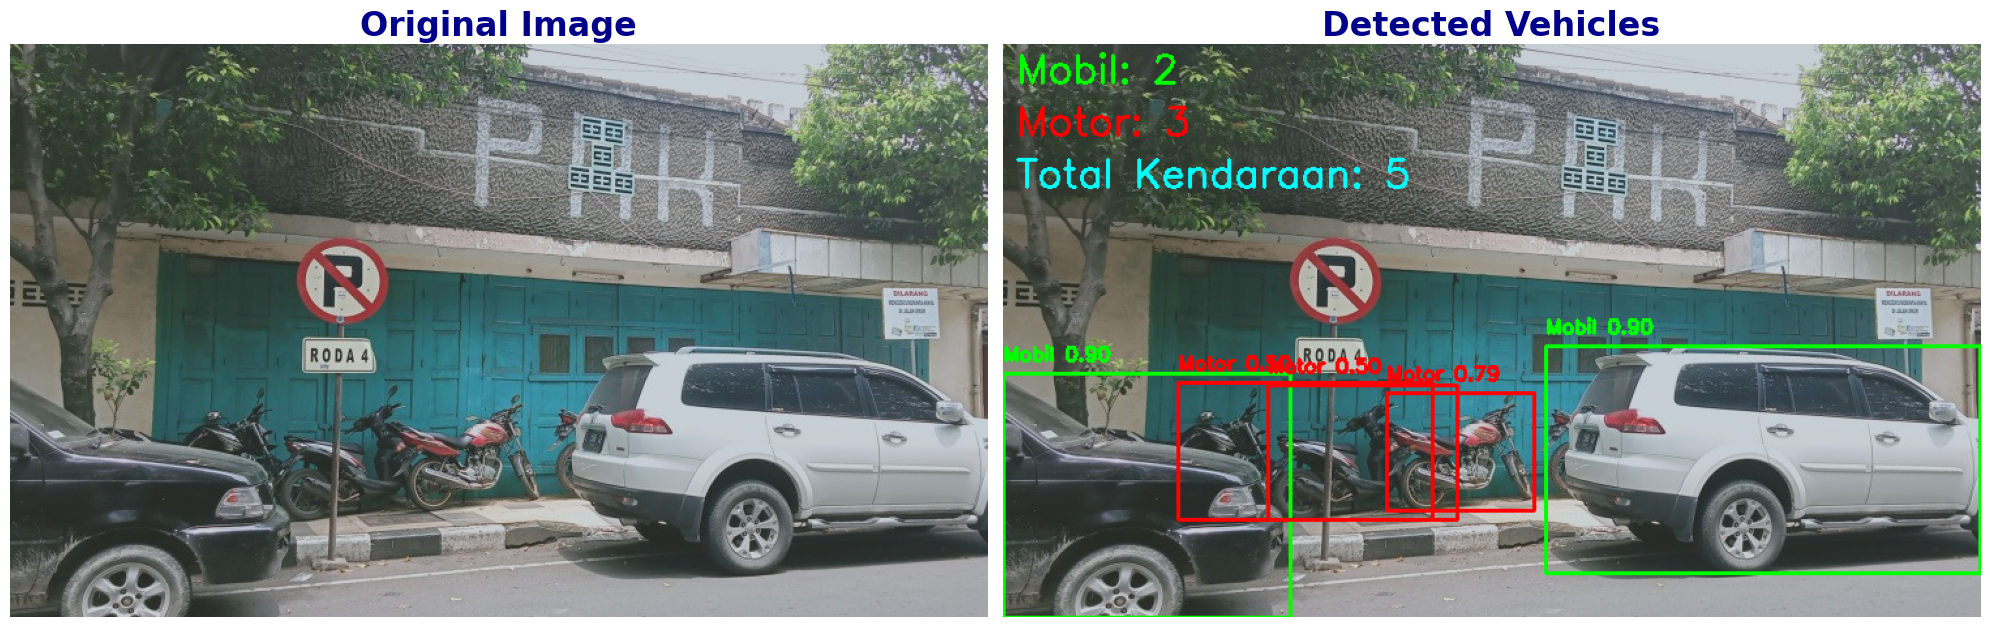


Hasil Deteksi:
Total Mobil: 2
Total Motor: 3
Total Kendaraan: 5


In [20]:
    # Image path
    image_path = '/content/drive/MyDrive/pcvk/mobilnmotor5.jpg'

    try:
        # proses deteksi
        original_image, annotated_image, total_cars, total_motorcycles = detect_vehicles(image_path)

        # hasil
        display_results(original_image, annotated_image, total_cars, total_motorcycles)

        # mencetak hasil
        print("\nHasil Deteksi:")
        print(f"Total Mobil: {total_cars}")
        print(f"Total Motor: {total_motorcycles}")
        print(f"Total Kendaraan: {total_cars + total_motorcycles}")

    except Exception as e:
        print(f"Error in processing the image: {str(e)}")


0: 384x640 3 persons, 4 bicycles, 225.8ms
Speed: 3.3ms preprocess, 225.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


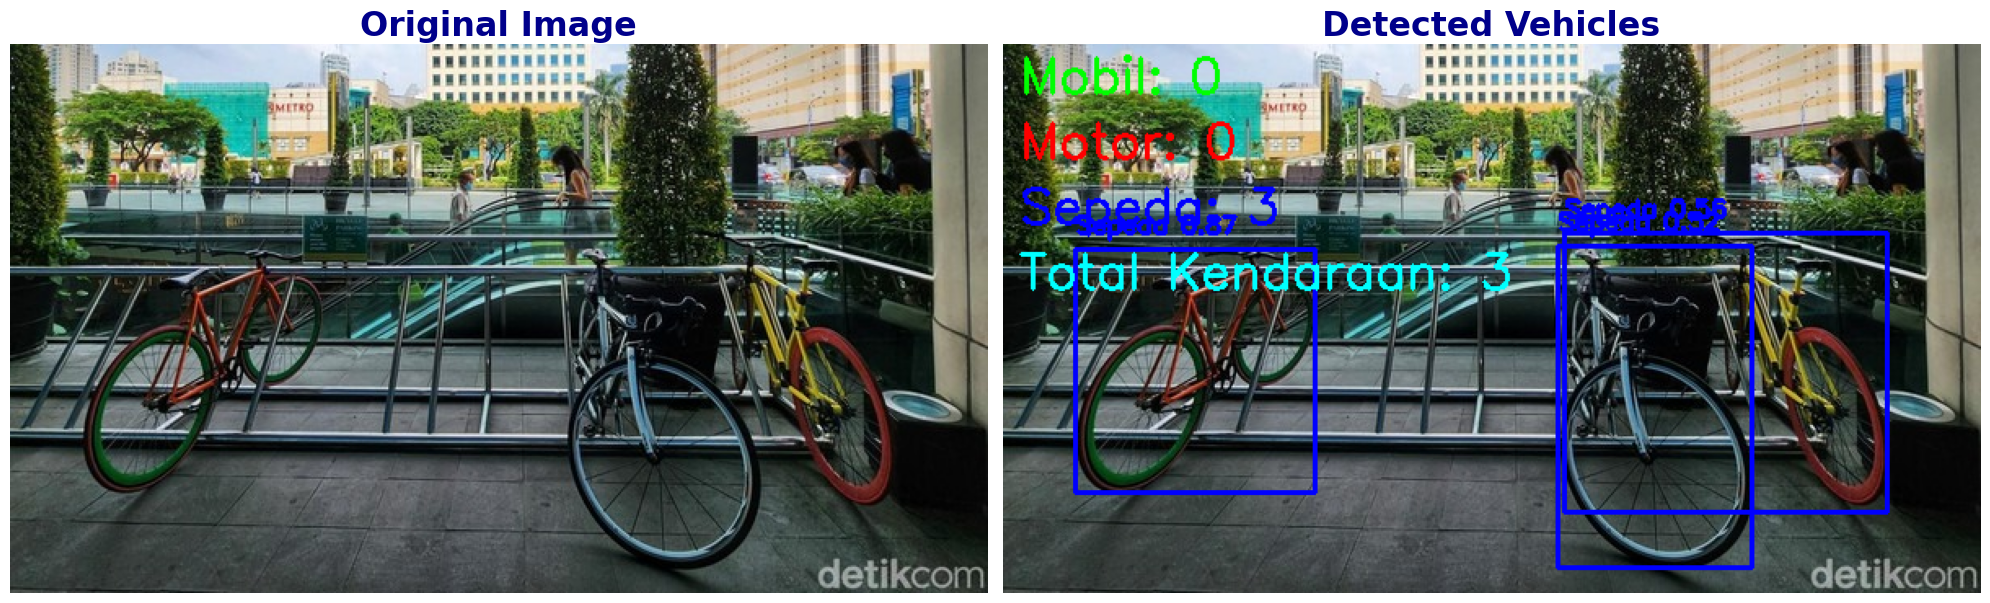


Hasil Deteksi:
Total Mobil: 0
Total Motor: 0
Total Sepeda: 3
Total Kendaraan: 3


In [21]:
import torch
import os
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Memuat model YOLOv8
model = YOLO('yolov8n.pt')

def detect_vehicles(image_path):
    # Membaca gambar dari path yang diberikan
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Gagal membaca gambar {image_path}")

    # Mengubah warna gambar dari BGR ke RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Melakukan inferensi dengan model YOLO
    results = model(image_rgb)[0]  # Mengambil hasil pertama

    # Inisialisasi penghitung untuk setiap jenis kendaraan
    total_cars = 0
    total_motorcycles = 0
    total_bicycles = 0

    # Menyalin gambar untuk anotasi
    annotated_image = image_rgb.copy()

    # Memproses setiap deteksi
    for box in results.boxes:
        # Mendapatkan koordinat bounding box
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Mendapatkan class_id dan confidence
        class_id = int(box.cls.cpu().numpy()[0])
        conf = float(box.conf.cpu().numpy()[0])

        # Menetapkan ambang batas confidence
        confidence_threshold = 0.5  # Sesuaikan sesuai kebutuhan

        # Jika deteksi adalah mobil (class 2)
        if class_id == 2 and conf >= confidence_threshold:
            total_cars += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Menggambar kotak hijau
            cv2.putText(annotated_image, f'Mobil {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Jika deteksi adalah sepeda motor (class 3)
        elif class_id == 3 and conf >= confidence_threshold:
            total_motorcycles += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Menggambar kotak biru
            cv2.putText(annotated_image, f'Motor {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Jika deteksi adalah sepeda (class 1)
        elif class_id == 1 and conf >= confidence_threshold:  # Memastikan ID kelas untuk sepeda
            total_bicycles += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Kotak merah untuk sepeda
            cv2.putText(annotated_image, f'Sepeda {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)  # Teks merah

    # Menambahkan statistik ke gambar
    cv2.putText(annotated_image, f"Mobil: {total_cars}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(annotated_image, f"Motor: {total_motorcycles}", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.putText(annotated_image, f"Sepeda: {total_bicycles}", (10, 110),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.putText(annotated_image, f"Total Kendaraan: {total_cars + total_motorcycles + total_bicycles}", (10, 150),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    return image_rgb, annotated_image, total_cars, total_motorcycles, total_bicycles

def display_results(original_image, annotated_image, total_cars, total_motorcycles, total_bicycles):
    # Membuat figure dengan dua subplot berdampingan
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Menampilkan gambar asli
    ax1.imshow(original_image)
    ax1.set_title("Original Image", fontsize=24, fontweight='bold', color='darkblue')
    ax1.axis('off')

    # Menampilkan gambar yang sudah dianotasi
    ax2.imshow(annotated_image)
    ax2.set_title("Detected Vehicles", fontsize=24, fontweight='bold', color='darkblue')
    ax2.axis('off')

    # Mengatur tata letak dan menampilkan plot
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Path gambar
    image_path = '/content/drive/MyDrive/pcvk/P sepedah 2.jpg'

    try:
        # Memproses deteksi
        original_image, annotated_image, total_cars, total_motorcycles, total_bicycles = detect_vehicles(image_path)

        # Menampilkan hasil
        display_results(original_image, annotated_image, total_cars, total_motorcycles, total_bicycles)

        # Mencetak hasil deteksi
        print("\nHasil Deteksi:")
        print(f"Total Mobil: {total_cars}")
        print(f"Total Motor: {total_motorcycles}")
        print(f"Total Sepeda: {total_bicycles}")
        print(f"Total Kendaraan: {total_cars + total_motorcycles + total_bicycles}")

    except Exception as e:
        print(f"Error in processing the image: {str(e)}")
